# Design Pattern Strategy

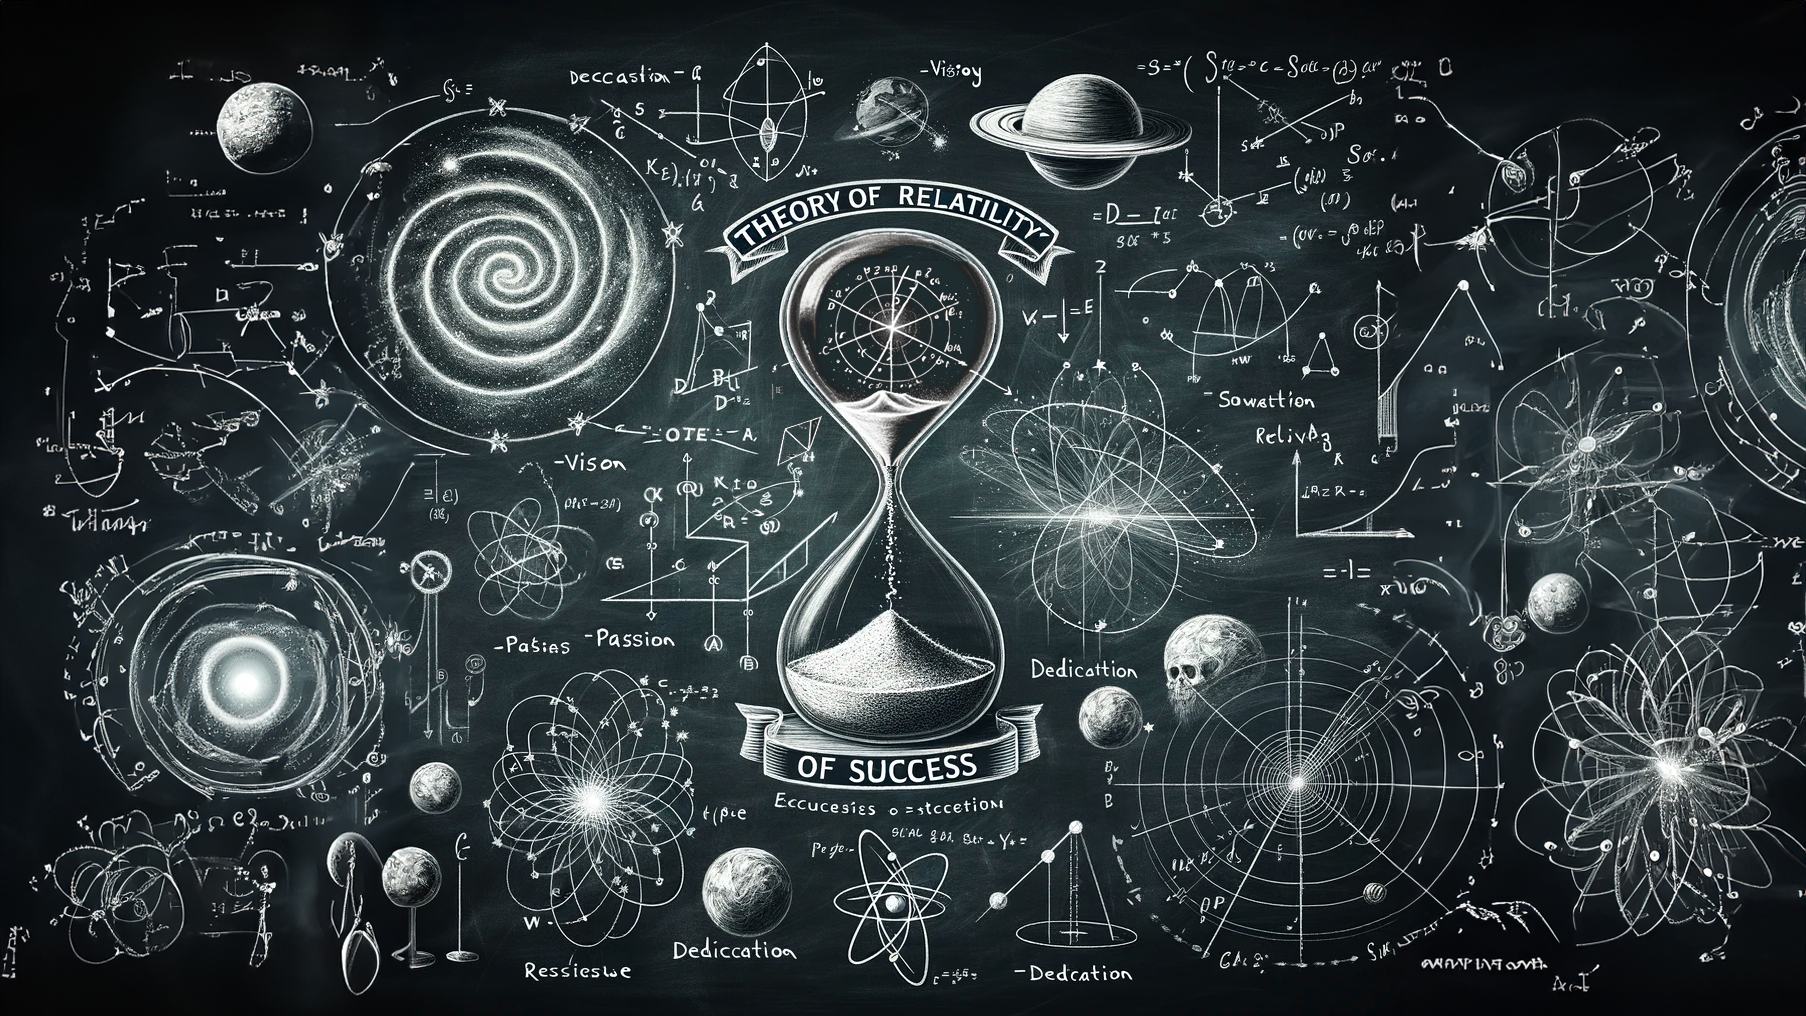

Alunos:

* André Ricardo Marques Bezerra
* Arthur Victor da Costa Soares
* João Gabriel de Souza Dutra
* Lucas Assunção da Costa Oliveira
* Marcos Antônio Ferreira Soares

## Teoria

### Padrão Comportamental

Um padrão de projeto comportamental é um tipo de padrão de design que se concentra em como os objetos interagem e se comunicam entre si. Esses padrões ajudam a definir maneiras eficazes de realizar a comunicação e a responsabilidade entre objetos em um sistema de software. Eles se preocupam mais com a interação entre objetos do que com a estrutura deles.

### Características dos Padrões de Projeto Comportamental

1. **Interação entre Objetos**: Focam na forma como os objetos trocam informações, colaboram e realizam ações complexas através de interações.
2. **Delegação de Responsabilidades**: Permitem que a responsabilidade de realizar uma ação ou um comportamento específico seja delegada a diferentes objetos, dependendo do contexto.
3. **Flexibilidade e Extensibilidade**: Facilitam a alteração e a extensão de comportamentos de objetos sem a necessidade de modificar seus códigos internos.

### Strategy
O design pattern Strategy é um dos padrões comportamentais mais conhecidos em engenharia de software. Ele permite que você defina uma família de algoritmos, encapsule cada um deles e os torne intercambiáveis. O Strategy permite que o algoritmo varie independentemente dos clientes que o utilizam.

### Estrutura do Padrão Strategy

O padrão Strategy envolve os seguintes componentes principais:

1. **Strategy (Estratégia)**: É uma interface comum para todos os algoritmos suportados. A interface declara métodos que cada algoritmo específico deve implementar.
2. **ConcreteStrategy (Estratégia Concreta)**: São implementações específicas da interface Strategy. Cada classe concreta implementa um algoritmo específico.
3. **Context (Contexto)**: Mantém uma referência a uma Strategy. O Contexto não sabe qual estratégia concreta está sendo usada, ele apenas chama o método da interface Strategy.

### Diagrama

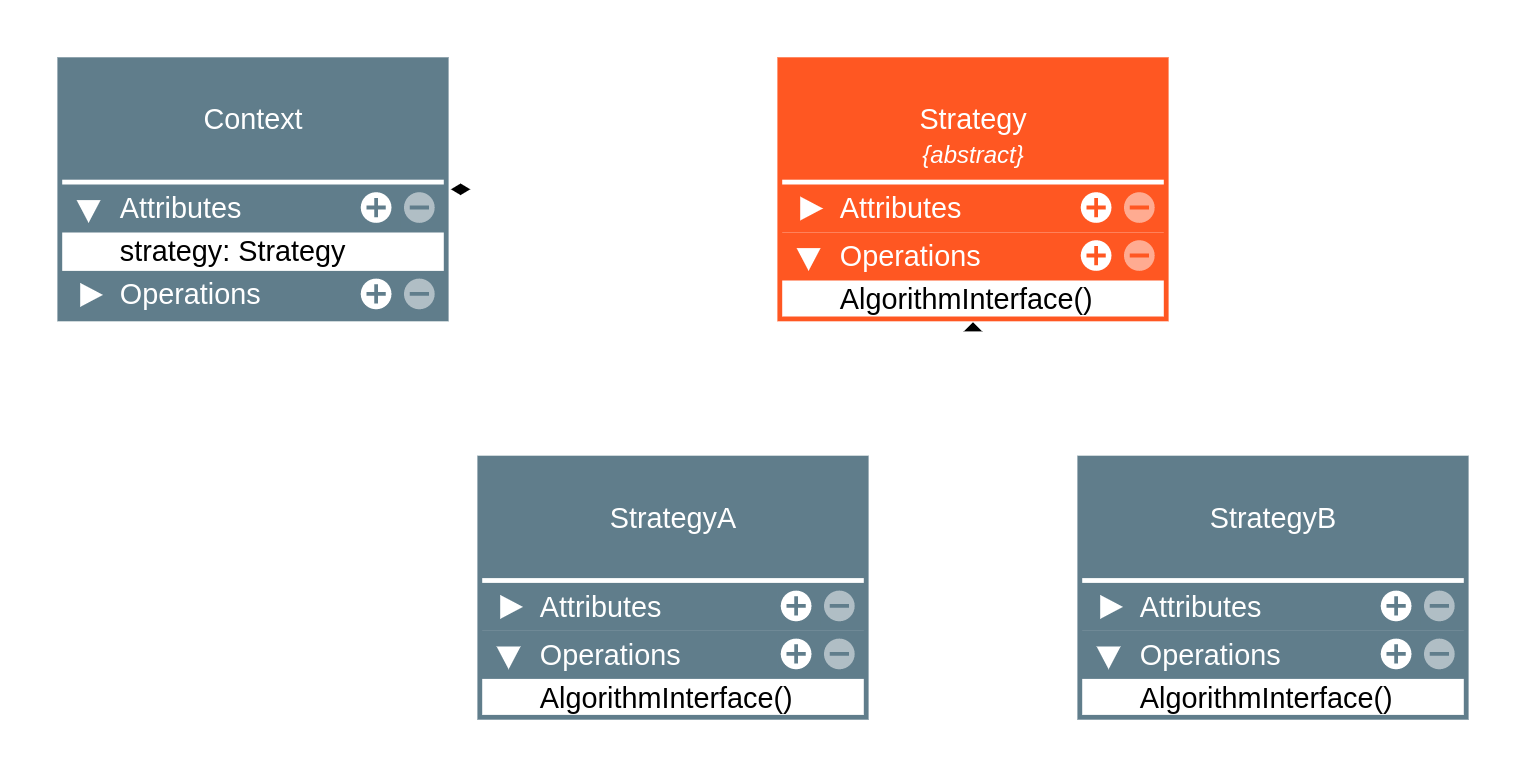

### Benefícios

1. **Fácil Substituição de Algoritmos**: Permite mudar o comportamento de um objeto em tempo de execução ao mudar a estratégia.
2. **Isolamento de Código**: Os algoritmos são isolados em suas próprias classes, facilitando a manutenção e o teste.
3. **Aumento da Flexibilidade**: Novos algoritmos podem ser adicionados sem modificar o contexto ou os outros algoritmos.

### Desvantagens

1. **Aumento do Número de Classes**: Pode aumentar significativamente o número de classes no seu programa.
2. **Complexidade**: Pode introduzir complexidade adicional devido à necessidade de gerenciar as estratégias e o contexto.

# Projeto Venda de carros

carros.avif

* Projeto será uma loja de carros, e as estratégia será os descontos da venda

## importando bibliotecas

In [1]:
import pandas as pd
from abc import ABC, abstractmethod

## Criando a base de dados da loja

In [2]:
tabela = {
    'marca' :['BMW','Dodge','Mercedes-Benz','BMW','Porshe','Ford','Chevrolet','Chevrolet'],
    'modelo':['M3 E46 GTR','Challenger SRT','Gla 200','X1','911','Mustang','Ônix Lt 1.0 Mt','Ônix 1.0 Turbo'],
    'preco' :[5000000,1125000,119950,299900,875000,529000,93765,100730]
}

base_dados = pd.DataFrame(tabela)
base_dados

marca          modelo    preco
0            BMW      M3 E46 GTR  5000000
1          Dodge  Challenger SRT  1125000
2  Mercedes-Benz         Gla 200   119950
3            BMW              X1   299900
4         Porshe             911   875000
5           Ford         Mustang   529000
6      Chevrolet  Ônix Lt 1.0 Mt    93765
7      Chevrolet  Ônix 1.0 Turbo   100730

## Criando a Interface

In [3]:
class Interface_Price(ABC):

    @abstractmethod
    def valor_final(preco):
        raise NotImplementedError

## Criando as Estratégias Concretas

valor_padrao retorna o preço sem desconto

In [4]:
class valor_padrao(Interface_Price):

    def __init__(self):
        pass

    def valor_final(preco):
        print(f'Preço final valor padrão: R$ {preco}')

black_friday retorna o valor com 15% de desconto

In [5]:
class black_friday(Interface_Price):

    def __init__(self):
        pass

    def valor_final(preco):
        preco = preco*0.85
        print(f'Preço final BlackFriday: R$ {preco}')

casos_especificos retorna o valor com o desconto de 20% para idosos e pessoas com problemas na coluna

In [6]:
class casos_especificos(Interface_Price):

    def __init__(self):
        pass

    def valor_final(preco):
        preco = preco*0.8
        print(f'Preço final de casos especificos: R$ {preco}')

## Criando o Contexto

In [7]:
class Lista_Compra:

    def __init__(self):
        self.lista_cliente = pd.DataFrame()

    def set_pedido(self, lista: list):
        self.lista_cliente = base_dados.loc[lista, base_dados.columns].copy()

    def preco(self, strategy: Interface_Price = valor_padrao):
        preco = 0
        for valor in self.lista_cliente['preco']:
            preco += valor
        strategy.valor_final(preco)

## Teste

In [8]:
base_dados

marca          modelo    preco
0            BMW      M3 E46 GTR  5000000
1          Dodge  Challenger SRT  1125000
2  Mercedes-Benz         Gla 200   119950
3            BMW              X1   299900
4         Porshe             911   875000
5           Ford         Mustang   529000
6      Chevrolet  Ônix Lt 1.0 Mt    93765
7      Chevrolet  Ônix 1.0 Turbo   100730

In [9]:
cliente = Lista_Compra()
cliente.set_pedido([0,4,6,6])
cliente.lista_cliente

marca          modelo    preco
0        BMW      M3 E46 GTR  5000000
4     Porshe             911   875000
6  Chevrolet  Ônix Lt 1.0 Mt    93765
6  Chevrolet  Ônix Lt 1.0 Mt    93765

In [10]:
cliente.preco()

Preço final valor padrão: R$ 6062530


In [11]:
cliente.preco(black_friday)

Preço final BlackFriday: R$ 5153150.5


In [12]:
cliente.preco(casos_especificos)

Preço final de casos especificos: R$ 4850024.0


In [13]:
cliente.preco(valor_padrao)

Preço final valor padrão: R$ 6062530
